In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
calendar = pd.read_csv("/Users/sonam.kumari/Downloads/seattle/calendar.csv")
listings = pd.read_csv("/Users/sonam.kumari/Downloads/seattle/listings.csv",encoding = "ISO-8859-1")
reviews =  pd.read_csv("/Users/sonam.kumari/Downloads/seattle/reviews.csv")

In [3]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [4]:
listings.shape

(3818, 92)

# Seattle AirBnb Hosts Neighbourhood

In [213]:
columns_loc = ['id', 'neighbourhood', 'neighbourhood_cleansed',
               'zipcode', 'property_type', 'room_type', 'price']

listings_loc = listings[columns_loc]
listings_loc.head()

,id,neighbourhood,neighbourhood_cleansed,zipcode,property_type,room_type,price
0,241032,Queen Anne,West Queen Anne,98119,Apartment,Entire home/apt,$85.00
1,953595,Queen Anne,West Queen Anne,98119,Apartment,Entire home/apt,$150.00
2,3308979,Queen Anne,West Queen Anne,98119,House,Entire home/apt,$975.00
3,7421966,Queen Anne,West Queen Anne,98119,Apartment,Entire home/apt,$100.00
4,278830,Queen Anne,West Queen Anne,98119,House,Entire home/apt,$450.00


In [214]:
listings_loc.describe(include='all')

,id,neighbourhood,neighbourhood_cleansed,zipcode,property_type,room_type,price
count,3.818000e+03,3402,3818,3811,3817,3818,3818
unique,NaN,81,87,28,16,3,273
top,NaN,Capitol Hill,Broadway,98122,House,Entire home/apt,$150.00
freq,NaN,351,397,420,1733,2541,162
mean,5.550111e+06,NaN,NaN,NaN,NaN,NaN,NaN
std,2.962660e+06,NaN,NaN,NaN,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.258256e+06,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.035127e+06,NaN,NaN,NaN,NaN,NaN,NaN



 property_type 



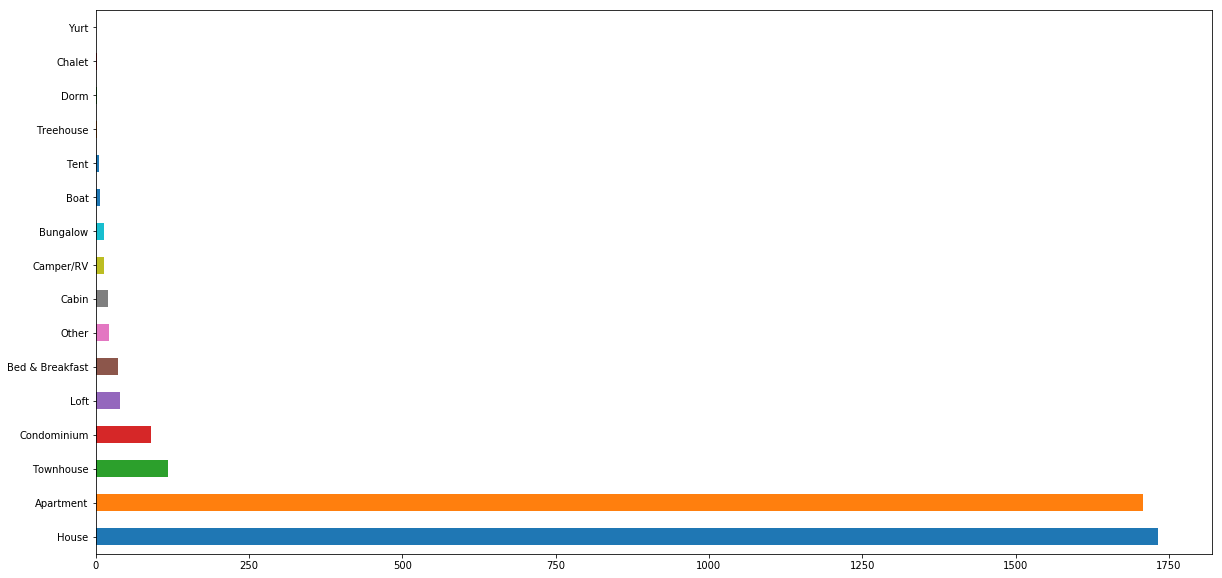

In [215]:
count_values_cols = ['neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type']

def plot_values_counts (col):
    print('\n', col ,'\n' )
    listings_loc[col].value_counts().plot(kind = 'barh' , figsize = (20,10));
    
plot_values_counts ('property_type')

In [217]:
def fix_prices(column_name, dataset_name):
    ''' Take a column name and dataset that contain dolar sign and comma,
        The function will update the dataframe with cleaned data.
    '''
    dataset_name[column_name] = dataset_name[column_name].str.replace('$','').str.replace(',','');

def fix_numeric(column_name, dataset_name):
    ''' Take a column name and dataset that are object type,
        The function will change the type to numeric.
    '''
    dataset_name[column_name] = pd.to_numeric(dataset_name[column_name]);

In [218]:
fix_prices('price', listings_loc)
fix_numeric('price', listings_loc)

/Users/sonam.kumari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sonam.kumari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [219]:

listings_loc.describe()

,id,price
count,3.818000e+03,3818.000000
mean,5.550111e+06,127.976166
std,2.962660e+06,90.250022
min,3.335000e+03,20.000000
25%,3.258256e+06,75.000000
50%,6.118244e+06,100.000000
75%,8.035127e+06,150.000000
max,1.034016e+07,1000.000000


In [220]:
listings_loc = listings_loc.drop(['neighbourhood', 'zipcode'] , axis = 1)

In [221]:
listings_loc.head()

,id,neighbourhood_cleansed,property_type,room_type,price
0,241032,West Queen Anne,Apartment,Entire home/apt,85.0
1,953595,West Queen Anne,Apartment,Entire home/apt,150.0
2,3308979,West Queen Anne,House,Entire home/apt,975.0
3,7421966,West Queen Anne,Apartment,Entire home/apt,100.0
4,278830,West Queen Anne,House,Entire home/apt,450.0


In [222]:
neigh_df = pd.DataFrame()

In [223]:
neigh_df['count'] = listings_loc['neighbourhood_cleansed'].value_counts()

In [224]:
neigh_df.head()

,count
Broadway,397
Belltown,234
Wallingford,167
Fremont,158
Minor,135


In [225]:
neigh_df = pd.DataFrame()
neigh_df['count'] = listings_loc['neighbourhood_cleansed'].value_counts()
neigh_mean_df = pd.DataFrame()
neigh_mean_df['mean_price'] = listings_loc.groupby(listings_loc['neighbourhood_cleansed'])['price'].mean()
neighbourhood_info = pd.merge(neigh_mean_df, neigh_df, left_on = neigh_mean_df.index,right_on = neigh_df.index)

In [226]:
neighbourhood_info.head()

,key_0,mean_price,count
0,Adams,121.671429,70
1,Alki,171.619048,42
2,Arbor Heights,126.800000,5
3,Atlantic,111.396226,53
4,Belltown,162.893162,234


In [227]:
neighbourhood_info.index = neighbourhood_info.key_0

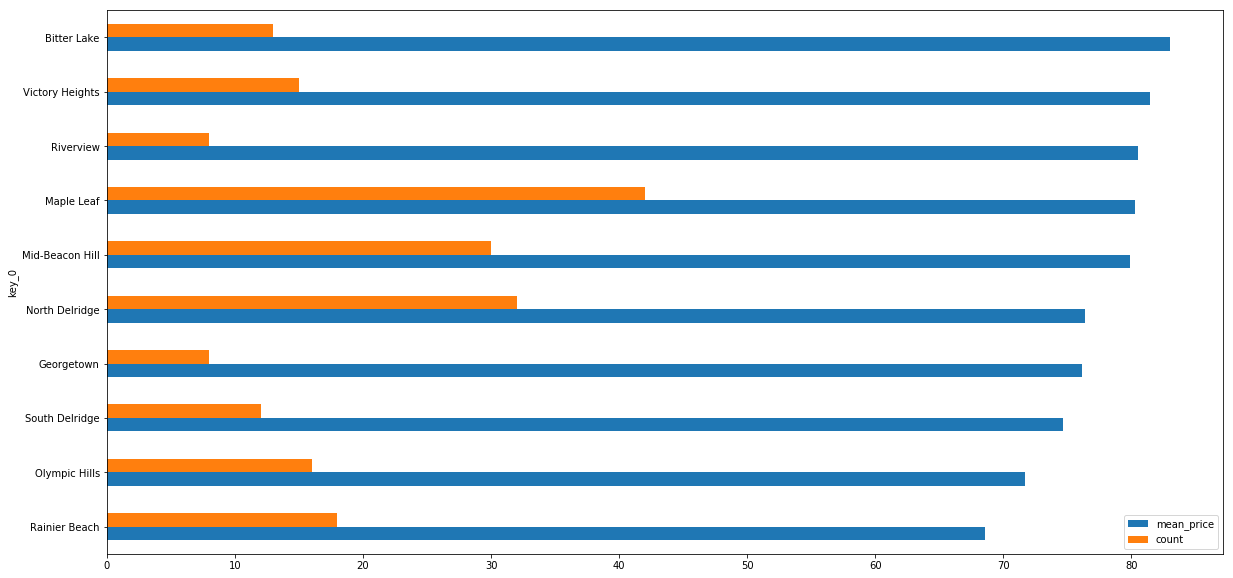

In [228]:
neighbourhood_info.sort_values(by = 'mean_price' ).iloc[0:10].plot(kind = 'barh',figsize = (20,10));

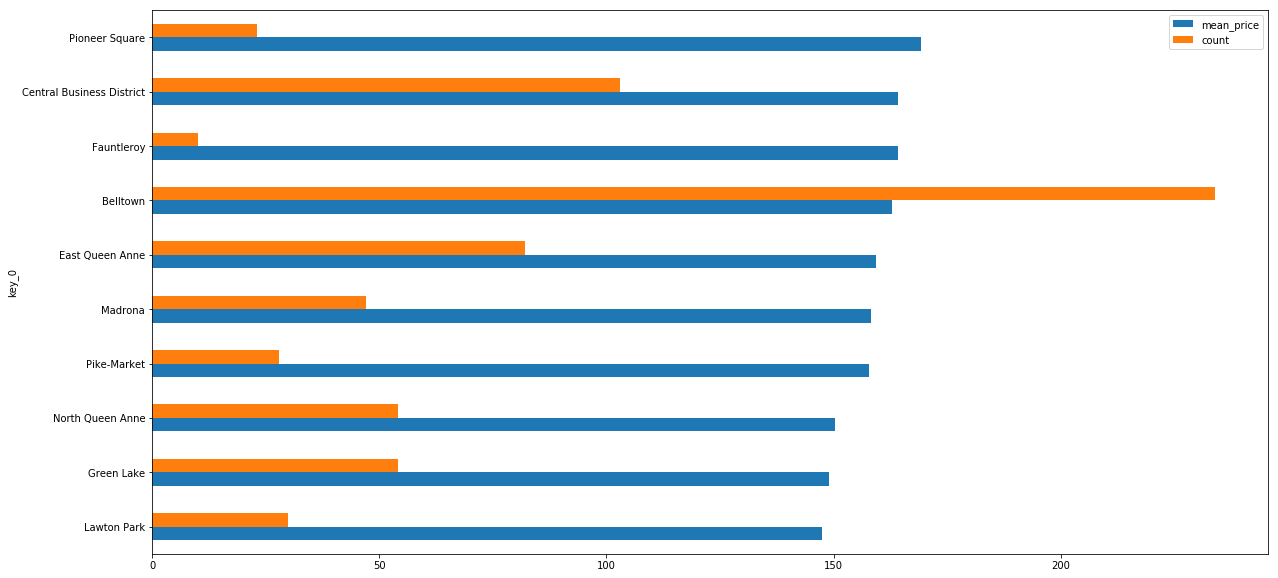

In [229]:
neighbourhood_info.sort_values(by = 'mean_price').iloc[67:-10].plot(kind = 'barh',figsize = (20,10));

we can see here the highest neighbourhood in Seattle are (Pioneer Square, Central Business DistrictFauntleroy) and lowest neighbourhood are (Rainier Beach, Olympic Hills, South Delridge)

In [202]:
calendar['month'] = pd.DatetimeIndex(calendar['date']).month

In [203]:
calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


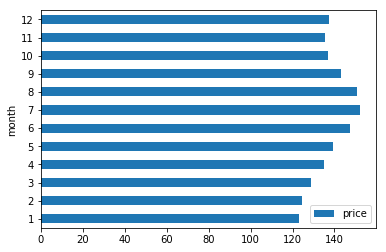

In [205]:
mean_of_day = pd.DataFrame(calendar.query("available == 't'").groupby
                           (['month']).mean()['price'])
mean_of_day.plot(kind = 'barh');

We can see how the price of houses increases in the months of June, July and August.

In [9]:
def remove_allNA(df):
    """
    Remove Columns with 100%+ Missing
    """
    missing = round(df.isnull().sum()/ df.shape[0]*100).reset_index().rename({"index":"columns",0:"missing"}, axis =1 )
    high_missing_columns = missing.loc[missing.missing ==100, "columns"]
    print("Columns to remove (100% missing Values)\n", list(high_missing_columns))
    df.drop(high_missing_columns,axis =1, inplace= True)
    return df

In [10]:
remove_allNA(listings)

Columns to remove (100% missing Values)
 ['license']


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,10.0,f,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,9.0,10.0,f,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,9.0,f,WASHINGTON,f,strict,t,t,6,1.55


In [11]:
remove_allNA(calendar)

Columns to remove (100% missing Values)
 []


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [12]:
def custom_describe(df):
    """
    Custom Describe Function - More Tailored to categorical type variables..
    """
    unique_count = []
    for x in df.columns:
        mode = df[x].mode().iloc[0]
        unique_count.append([x,
                             df[x].nunique(),
                             df[x].isnull().sum(),
                             mode,
                             df[x][df[x]==mode].count(),
                             df[x].dtypes])
    print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))
    return pd.DataFrame(unique_count, columns=["Column","Unique","Missing","Mode","Mode Occurence","dtype"])\
                .set_index("Column")


In [13]:
custom_describe(listings)

Dataframe Dimension: 3818 Rows, 91 Columns


,Unique,Missing,Mode,Mode Occurence,dtype
Column,,,,,
id,3818,0,3335,1,int64
listing_url,3818,0,https://www.airbnb.com/rooms/10000273,1,object
scrape_id,1,0,20160104002432,3818,int64
last_scraped,1,0,2016-01-04,3818,object
name,3792,0,Capitol Hill Apartment,3,object
summary,3478,177,This is a modern fully-furnished studio apartm...,15,object
space,3119,569,"*Note: This fall, there will be major renovati...",14,object
description,3742,0,Our space is a mix of a hostel and a home. We ...,10,object
experiences_offered,1,0,none,3818,object


In [14]:
custom_describe(calendar)

Dataframe Dimension: 1393570 Rows, 4 Columns


,Unique,Missing,Mode,Mode Occurence,dtype
Column,,,,,
listing_id,3818,0,3335,365,int64
date,365,0,2016-01-04,3818,object
available,2,0,t,934542,object
price,669,459028,$150.00,36646,object


In [15]:
custom_describe(reviews)

Dataframe Dimension: 84849 Rows, 6 Columns


,Unique,Missing,Mode,Mode Occurence,dtype
Column,,,,,
listing_id,3191,0,208356,474,int64
id,84849,0,3721,1,int64
date,1930,0,2015-09-21,580,object
reviewer_id,75730,0,206203,67,int64
reviewer_name,14380,0,David,870,object
comments,84136,18,The host canceled this reservation the day bef...,57,object


In [16]:
print(calendar.describe())

         listing_id
count  1.393570e+06
mean   5.550111e+06
std    2.962274e+06
min    3.335000e+03
25%    3.258213e+06
50%    6.118244e+06
75%    8.035212e+06
max    1.034016e+07


# Merge calendar and listings

In [19]:
new_df = pd.merge(calendar, listings, left_on=["listing_id"],right_on=["id"])

In [20]:
new_df.shape

(1393570, 95)

In [21]:
new_df['price_y'] = new_df['price_y'].str.replace("$","").str.replace(',', '').astype(float)

Skewness: 3.111903
Kurtosis: 16.593871


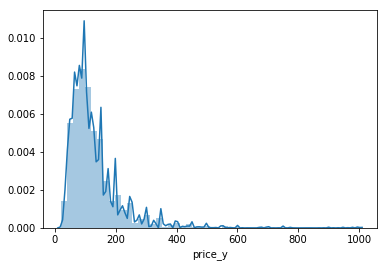

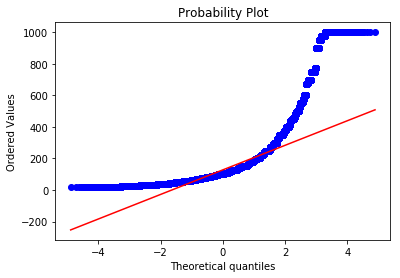

In [22]:
import seaborn as sns
from scipy import stats
sns.distplot(new_df['price_y']);
fig = plt.figure()
res = stats.probplot(new_df['price_y'], plot=plt)
print("Skewness: %f" % new_df['price_y'].skew())
print("Kurtosis: %f" % new_df['price_y'].kurt())

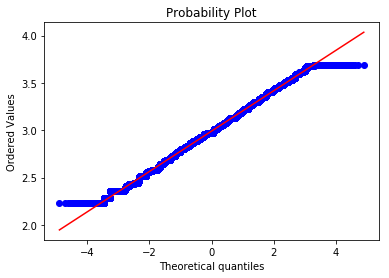

In [23]:
import seaborn as sns
from scipy import stats
fig = plt.figure()
xt, _ = stats.boxcox(new_df['price_y'])
prob = stats.probplot(xt, dist=stats.norm, plot=plt)
#ax2.set_title('Probplot after Box-Cox transformation')

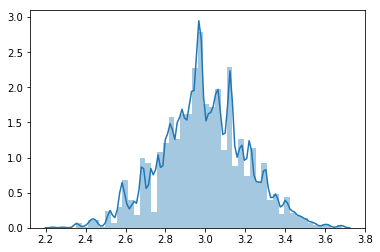

In [24]:
sns.distplot(xt);

In [25]:
new_df['price'] = xt

In [26]:
print("Skewness: %f" % new_df['price'].skew())
print("Kurtosis: %f" % new_df['price'].kurt())

Skewness: -0.003744
Kurtosis: 0.102284


In [27]:
new_df['reviews_per_month']=new_df['reviews_per_month'].replace(np.NaN,new_df['reviews_per_month'].mean())

In [28]:
new_df['reviews_per_month'].mean()

2.0789188342198166

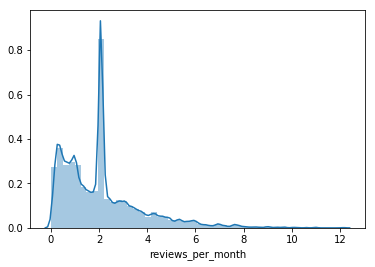

<Figure size 432x288 with 0 Axes>

In [29]:
import seaborn as sns
from scipy import stats
sns.distplot(new_df['reviews_per_month']);
fig = plt.figure()

In [30]:
new_df.reviews_per_month.dtype

dtype('float64')

In [31]:
new_df['reviews_per_month'].isnull().sum()/new_df.shape[0]

0.0

In [32]:
can_policy = new_df['cancellation_policy'].value_counts()

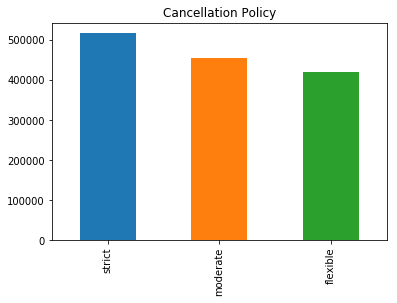

In [33]:
(can_policy).plot(kind="bar");
plt.title("Cancellation Policy");

In [34]:
rev_score = new_df.review_scores_value.value_counts()

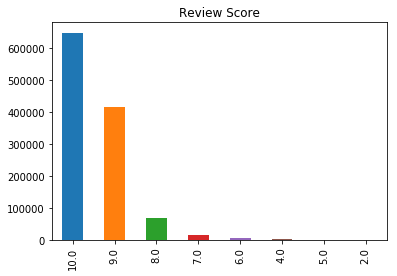

In [35]:
(rev_score).plot(kind="bar");
plt.title("Review Score");

In [ ]:
mean_of_day = pd.DataFrame(calendar.query("available == 't'").groupby
                           (['date']).mean()['price'])
mean_of_day.plot(kind = 'barh',figsize = (20,100));

In [36]:
new_df['date'].dtype

dtype('O')

In [37]:
# check out missing data
total = new_df.isnull().sum().sort_values(ascending=False)
percent = (new_df.isnull().sum()/new_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
square_feet,1358165,0.974594
monthly_price,839865,0.602672
security_deposit,712480,0.511262
weekly_price,660285,0.473808
notes,586190,0.420639
price_x,459028,0.329390
neighborhood_overview,376680,0.270299
cleaning_fee,375950,0.269775
transit,340910,0.244631
host_about,313535,0.224987


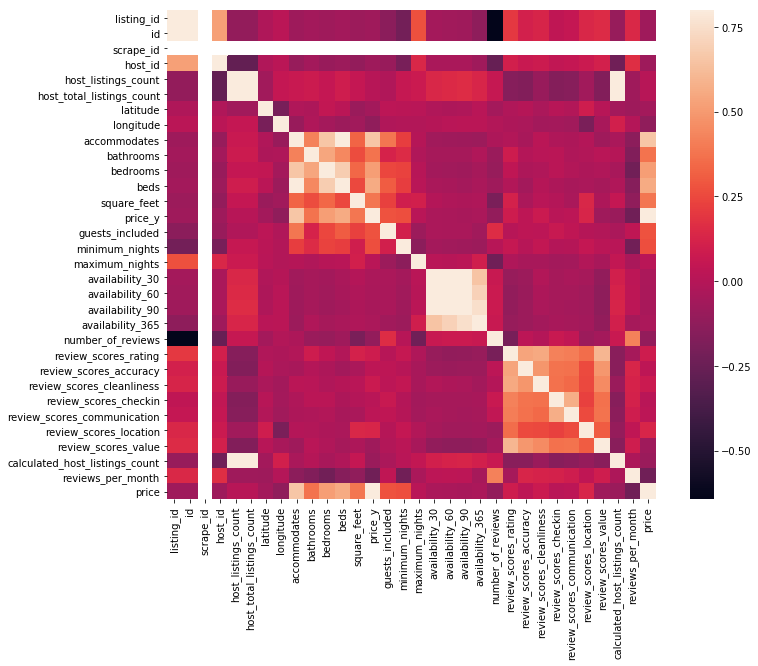

In [38]:
corrmat = new_df.corr(method = 'spearman')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Here we see the positive correlation of price with accommodates,bathroom,bedrooms and beds with price

In [39]:
new_df.isnull().sum()/new_df.shape[0]*100

listing_id                           0.000000
date                                 0.000000
available                            0.000000
price_x                             32.938998
id                                   0.000000
listing_url                          0.000000
scrape_id                            0.000000
last_scraped                         0.000000
name                                 0.000000
summary                              4.635935
space                               14.903091
description                          0.000000
experiences_offered                  0.000000
neighborhood_overview               27.029859
notes                               42.063908
transit                             24.463070
thumbnail_url                        8.381351
medium_url                           8.381351
picture_url                          0.000000
xl_picture_url                       8.381351
host_id                              0.000000
host_url                          

In [40]:
remove_allNA(new_df)

Columns to remove (100% missing Values)
 []


,listing_id,date,available,price_x,id,listing_url,scrape_id,last_scraped,name,summary,...,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price
0,241032,2016-01-04,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
1,241032,2016-01-05,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
2,241032,2016-01-06,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
3,241032,2016-01-07,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
4,241032,2016-01-08,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
5,241032,2016-01-09,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
6,241032,2016-01-10,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
7,241032,2016-01-11,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
8,241032,2016-01-12,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
9,241032,2016-01-13,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329


In [41]:
new_df.drop_duplicates(keep='first')

,listing_id,date,available,price_x,id,listing_url,scrape_id,last_scraped,name,summary,...,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price
0,241032,2016-01-04,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
1,241032,2016-01-05,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
2,241032,2016-01-06,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
3,241032,2016-01-07,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
4,241032,2016-01-08,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
5,241032,2016-01-09,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
6,241032,2016-01-10,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
7,241032,2016-01-11,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
8,241032,2016-01-12,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
9,241032,2016-01-13,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329


In [42]:
custom_describe(new_df)

Dataframe Dimension: 1393570 Rows, 96 Columns


,Unique,Missing,Mode,Mode Occurence,dtype
Column,,,,,
listing_id,3818,0,3335,365,int64
date,365,0,2016-01-04,3818,object
available,2,0,t,934542,object
price_x,669,459028,$150.00,36646,object
id,3818,0,3335,365,int64
listing_url,3818,0,https://www.airbnb.com/rooms/10000273,365,object
scrape_id,1,0,20160104002432,1393570,int64
last_scraped,1,0,2016-01-04,1393570,object
name,3792,0,Capitol Hill Apartment,1095,object


In [43]:
 np.count_nonzero(new_df.isnull()) 

9720538

In [44]:
new_df[pd.isnull(new_df).any(axis=1)]

,listing_id,date,available,price_x,id,listing_url,scrape_id,last_scraped,name,summary,...,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price
0,241032,2016-01-04,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
1,241032,2016-01-05,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
2,241032,2016-01-06,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
3,241032,2016-01-07,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
4,241032,2016-01-08,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
5,241032,2016-01-09,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
6,241032,2016-01-10,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
7,241032,2016-01-11,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
8,241032,2016-01-12,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329
9,241032,2016-01-13,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,WASHINGTON,f,moderate,f,f,2,4.070000,2.911329


In [45]:
no_null = set(new_df.columns[new_df.isnull().mean()==0])

In [46]:
len(no_null)

52

In [47]:
no_null

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'available',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'country',
 'country_code',
 'date',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_id',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_scraped',
 'latitude',
 'listing_id',
 'listing_url',
 'longitude',
 'market',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'price_y',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'reviews_per_month',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [48]:
most_missing_columns = set(new_df.columns[new_df.isnull().mean()>0.75])

In [49]:
most_missing_columns

{'square_feet'}

In [50]:
new_df['square_feet'].mean()

854.6185567010309

In [51]:
new_df['square_feet']=new_df['square_feet'].replace(np.NaN,new_df['square_feet'].mean())

In [52]:
new_df['square_feet'].isnull().sum()

0

In [53]:
fityper_missing_columns = set(new_df.columns[new_df.isnull().mean()>0.50])

In [54]:
fityper_missing_columns

{'monthly_price', 'security_deposit'}

In [55]:
new_df['monthly_price'].isnull().sum()

839865

In [56]:
new_df['monthly_price'].dtype

dtype('O')

In [57]:
new_df['monthly_price'] = new_df['monthly_price'].str.replace("$","").str.replace(',', '')

In [58]:
new_df['security_deposit']=new_df['security_deposit'].str.replace("$","").str.replace(',', '').astype(float)

In [59]:
new_df['monthly_price']=new_df['monthly_price'].astype(float)

In [60]:
new_df['monthly_price'][365:380]

365    3000.0
366    3000.0
367    3000.0
368    3000.0
369    3000.0
370    3000.0
371    3000.0
372    3000.0
373    3000.0
374    3000.0
375    3000.0
376    3000.0
377    3000.0
378    3000.0
379    3000.0
Name: monthly_price, dtype: float64

In [61]:
new_df['monthly_price'].mean()

2613.336189848385

In [62]:
new_df['security_deposit'].mean()

287.61039657020365

In [63]:
new_df['monthly_price'].isnull().sum()/new_df.shape[0]

0.6026715557883708

In [64]:
new_df['monthly_price']=new_df['monthly_price'].replace(np.NaN,new_df['monthly_price'].mean())

In [65]:
new_df['security_deposit']=new_df['security_deposit'].replace(np.NaN,new_df['security_deposit'].mean())

In [66]:
new_df['room_type'].value_counts()

Entire home/apt    927465
Private room       423400
Shared room         42705
Name: room_type, dtype: int64

In [67]:
new_df['smart_location'].value_counts()

Seattle, WA                  1390650
Seattle , WA                     730
West Seattle, WA                 730
è¥¿é
å¾, WA                    365
Phinney Ridge Seattle, WA        365
Ballard, Seattle, WA             365
seattle, wa                      365
Name: smart_location, dtype: int64

In [68]:
new_df['price_y'].describe()

count    1.393570e+06
mean     1.279762e+02
std      9.023823e+01
min      2.000000e+01
25%      7.500000e+01
50%      1.000000e+02
75%      1.500000e+02
max      1.000000e+03
Name: price_y, dtype: float64

In [69]:
new_df['price_x'].describe()

count      934542
unique        669
top       $150.00
freq        36646
Name: price_x, dtype: object

In [70]:
new_df.columns

Index(['listing_id', 'date', 'available', 'price_x', 'id', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathr

In [71]:
new_df.reviews_per_month.value_counts()

2.078919     228855
1.000000      25550
2.000000      16425
0.230000       8760
0.160000       7665
0.360000       7665
0.810000       7665
0.260000       7300
0.530000       6935
0.370000       6570
0.710000       6570
0.300000       6570
0.860000       6205
0.320000       6205
0.650000       5840
0.240000       5840
0.310000       5840
0.450000       5840
0.410000       5840
0.280000       5840
3.000000       5840
1.060000       5840
0.670000       5475
0.900000       5475
0.920000       5475
0.290000       5475
0.220000       5475
0.250000       5475
0.630000       5475
1.140000       5475
              ...  
2.970000        365
8.380000        365
5.540000        365
7.660000        365
9.080000        365
4.080000        365
5.840000        365
8.500000        365
5.240000        365
7.570000        365
9.470000        365
6.420000        365
4.270000        365
9.000000        365
6.700000        365
10.950000       365
6.830000        365
5.010000        365
8.460000        365


In [72]:
new_df.calculated_host_listings_count.value_counts()

1     894615
2     209875
3      95630
4      47450
5      25550
6      23725
37     13505
31     13140
34     12410
11      8030
7       7665
21      7665
8       6935
9       6935
18      6570
15      5840
12      4380
10      3650
Name: calculated_host_listings_count, dtype: int64

In [73]:
new_df.require_guest_phone_verification.value_counts()

f    1256695
t     136875
Name: require_guest_phone_verification, dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# apply "le.fit_transform"
new_df['require_guest_phone_verification']= le.fit_transform(new_df['require_guest_phone_verification'])

In [75]:
new_df['require_guest_phone_verification'].value_counts()

0    1256695
1     136875
Name: require_guest_phone_verification, dtype: int64

In [76]:
new_df['require_guest_profile_picture']= le.fit_transform(new_df['require_guest_profile_picture'])

In [77]:
new_df['require_guest_profile_picture'].value_counts()

0    1276405
1     117165
Name: require_guest_profile_picture, dtype: int64

In [78]:
new_df['cancellation_policy'].value_counts()

strict      517205
moderate    456615
flexible    419750
Name: cancellation_policy, dtype: int64

In [79]:
new_df.accommodates.value_counts()

2     593855
4     286525
3     145270
6     121180
1      93440
5      67160
8      43435
7      18980
10      9125
12      5475
9       4745
16      1460
14      1095
11      1095
15       730
Name: accommodates, dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['available']= le.fit_transform(new_df['available'])

In [81]:
new_df.columns

Index(['listing_id', 'date', 'available', 'price_x', 'id', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathr

In [82]:
new_df.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    289810
Capitol Hill           206955
Downtown               193450
Central Area           134685
Queen Anne             107675
Ballard                 83950
West Seattle            74095
Rainier Valley          58035
University District     44530
Beacon Hill             43070
Cascade                 32485
Northgate               29200
Delridge                28835
Lake City               24455
Magnolia                22265
Seward Park             16060
Interbay                 4015
Name: neighbourhood_group_cleansed, dtype: int64

In [83]:
new_df.neighbourhood.value_counts()

Capitol Hill                 128115
Ballard                       77745
Belltown                      74460
Minor                         70080
Queen Anne                    68255
Fremont                       54020
Wallingford                   52195
University District           39055
First Hill                    38325
Stevens                       35770
North Beacon Hill             34675
Lower Queen Anne              30295
Central Business District     29565
Greenwood                     28835
Columbia City                 22265
Ravenna                       21535
Phinney Ridge                 20440
Magnolia                      20075
Green Lake                    18980
Atlantic                      18250
North Admiral                 17520
Mount Baker                   16790
Leschi                        16060
Maple Leaf                    14965
Eastlake                      14965
Madrona                       14600
Pike Place Market             14235
The Junction                

In [84]:
new_df.host_response_time.value_counts()

within an hour        617580
within a few hours    353320
within a day          217905
a few days or more     13870
Name: host_response_time, dtype: int64

In [85]:
new_df.host_neighbourhood.value_counts()

Capitol Hill                 147825
Belltown                      92710
Ballard                       76650
Minor                         69715
Queen Anne                    68985
Fremont                       53655
Wallingford                   48910
North Beacon Hill             36865
Ravenna                       36500
Central Business District     33945
Stevens                       31755
First Hill                    31025
Greenwood                     29200
University District           29200
Lower Queen Anne              27375
Columbia City                 22265
Green Lake                    20075
North Admiral                 19345
Magnolia                      19345
Phinney Ridge                 18980
Atlantic                      17885
Leschi                        16790
Mount Baker                   16060
Eastlake                      15330
Maple Leaf                    14600
Madrona                       14600
The Junction                  14235
Roosevelt                   

In [86]:
new_df.columns

Index(['listing_id', 'date', 'available', 'price_x', 'id', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathr

In [87]:
new_df.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                         16425
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                      4015
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Es

In [88]:
new_df.bed_type.value_counts()

Real Bed         1334805
Futon              27010
Pull-out Sofa      17155
Airbed              9855
Couch               4745
Name: bed_type, dtype: int64

In [89]:
new_df['square_feet']=new_df['square_feet'].astype(float)

In [90]:
new_df['square_feet'].isnull().sum()/new_df.shape[0]

0.0

In [91]:
new_df['weekly_price'] = new_df['weekly_price'].str.replace("$","").str.replace(",","").astype(float)

In [92]:
new_df['weekly_price'].isnull().sum()/new_df.shape[0]

0.4738082765845993

In [93]:
new_df['weekly_price']=new_df['weekly_price'].replace(np.NaN,new_df['weekly_price'].mean())

In [94]:
new_df.cleaning_fee.value_counts()

$50.00     113150
$25.00      89425
$60.00      67525
$20.00      62415
$100.00     62050
$35.00      57305
$10.00      56210
$30.00      50005
$75.00      49640
$40.00      44895
$15.00      38325
$45.00      26280
$150.00     21900
$80.00      20805
$65.00      16790
$99.00      16790
$125.00     14600
$95.00      14235
$85.00      12775
$5.00       12410
$90.00      11680
$120.00      9855
$70.00       9125
$55.00       7665
$200.00      7300
$250.00      7300
$175.00      5475
$96.00       4745
$300.00      4380
$110.00      4015
            ...  
$76.00        365
$130.00       365
$42.00        365
$185.00       365
$189.00       365
$142.00       365
$26.00        365
$194.00       365
$117.00       365
$68.00        365
$210.00       365
$134.00       365
$179.00       365
$21.00        365
$27.00        365
$58.00        365
$106.00       365
$131.00       365
$79.00        365
$230.00       365
$240.00       365
$97.00        365
$13.00        365
$143.00       365
$87.00    

In [95]:
new_df['cleaning_fee'] = new_df['cleaning_fee'].str.replace("$","").astype(float)

In [96]:
new_df['cleaning_fee'].isnull().sum()/new_df.shape[0]

0.26977475117862754

In [97]:
new_df['market'].value_counts()

Seattle    1393570
Name: market, dtype: int64

In [98]:
new_df['cleaning_fee']=new_df['cleaning_fee'].replace(np.NaN,new_df['cleaning_fee'].mean())

In [99]:
new_df['extra_people'] = new_df['extra_people'].str.replace("$","").astype(float)

In [100]:
new_df.minimum_nights.value_counts()

1       587650
2       519395
3       175200
4        44530
5        24455
7        18250
6         5840
14        5840
20        4015
30        2190
10        1825
13         730
8          365
1000       365
11         365
31         365
15         365
21         365
26         365
28         365
29         365
12         365
Name: minimum_nights, dtype: int64

In [101]:
new_df.maximum_nights.value_counts()

1125      895345
30         66795
365        54020
14         44895
7          39420
90         31025
60         25185
10         21170
180        20075
29         18615
28         17155
21         14235
5          13870
15         13870
31         11680
3          10585
6           9490
4           8760
120         7300
20          6205
730         5840
13          3285
9           3285
100         2920
2           2920
45          2920
8           2555
35          2190
27          2190
22          1825
           ...  
65          1460
150         1460
50          1095
26          1095
24          1095
12          1095
93          1095
99          1095
33           730
18           730
270          730
183          730
125          730
1000         730
23           730
44           365
1825         365
100000       365
500          365
400          365
352          365
330          365
19           365
95           365
234          365
70           365
160          365
91           3

In [102]:
new_df.calculated_host_listings_count.value_counts()

1     894615
2     209875
3      95630
4      47450
5      25550
6      23725
37     13505
31     13140
34     12410
11      8030
7       7665
21      7665
8       6935
9       6935
18      6570
15      5840
12      4380
10      3650
Name: calculated_host_listings_count, dtype: int64

In [103]:
new_df.calendar_updated.value_counts()

today            257690
2 weeks ago      126655
3 weeks ago      109500
2 months ago     102565
a week ago        90520
yesterday         84315
3 months ago      79570
4 weeks ago       77745
3 days ago        59130
5 weeks ago       56940
4 days ago        52925
4 months ago      48545
5 days ago        48180
6 weeks ago       43070
2 days ago        35040
5 months ago      33215
7 weeks ago       22995
6 months ago      10585
6 days ago        10220
1 week ago         9490
never              8760
7 months ago       8395
8 months ago       5110
10 months ago      2920
9 months ago       2555
12 months ago      1825
11 months ago      1825
13 months ago       730
22 months ago       730
30 months ago       365
16 months ago       365
17 months ago       365
15 months ago       365
14 months ago       365
Name: calendar_updated, dtype: int64

In [104]:
new_df.has_availability.value_counts()

t    1393570
Name: has_availability, dtype: int64

In [105]:
new_df.review_scores_rating.value_counts()

100.0    285065
98.0     106580
96.0     101470
97.0      97090
95.0      94900
94.0      72270
93.0      67160
99.0      53290
90.0      50370
80.0      40515
92.0      38325
91.0      35405
87.0      20075
89.0      19345
88.0      17155
85.0       8760
84.0       8395
86.0       6205
83.0       4745
60.0       4380
82.0       3650
70.0       2920
73.0       2555
76.0       1825
72.0       1460
40.0       1460
77.0       1460
78.0       1460
75.0       1095
71.0       1095
81.0       1095
74.0        730
79.0        730
68.0        730
67.0        730
66.0        730
65.0        365
64.0        365
57.0        365
55.0        365
53.0        365
20.0        365
Name: review_scores_rating, dtype: int64

In [106]:
new_df.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    289810
Capitol Hill           206955
Downtown               193450
Central Area           134685
Queen Anne             107675
Ballard                 83950
West Seattle            74095
Rainier Valley          58035
University District     44530
Beacon Hill             43070
Cascade                 32485
Northgate               29200
Delridge                28835
Lake City               24455
Magnolia                22265
Seward Park             16060
Interbay                 4015
Name: neighbourhood_group_cleansed, dtype: int64

In [107]:
new_df.columns

Index(['listing_id', 'date', 'available', 'price_x', 'id', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathr

In [108]:
new_df['property_type'].value_counts()

House              632545
Apartment          623420
Townhouse           43070
Condominium         33215
Loft                14600
Bed & Breakfast     13505
Other                8030
Cabin                7665
Bungalow             4745
Camper/RV            4745
Boat                 2920
Tent                 1825
Treehouse            1095
Chalet                730
Dorm                  730
Yurt                  365
Name: property_type, dtype: int64

In [109]:
new_df['is_location_exact'].value_counts()

t    1245380
f     148190
Name: is_location_exact, dtype: int64

In [110]:
new_df['is_location_exact']= le.fit_transform(new_df['is_location_exact'])

In [111]:
new_df['country'].value_counts()

United States    1393570
Name: country, dtype: int64

In [112]:
new_df['instant_bookable'].value_counts()

f    1177855
t     215715
Name: instant_bookable, dtype: int64

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['instant_bookable']= le.fit_transform(new_df['instant_bookable'])

In [114]:
new_df['instant_bookable'].value_counts()

0    1177855
1     215715
Name: instant_bookable, dtype: int64

In [115]:
new_df['requires_license'].replace(0, 'f',inplace=True)

In [116]:
#new_df[new_df.isnull().any(axis=1)]

In [117]:
new_df['date'] =  pd.to_datetime(new_df['date'], format='%Y/%m/%d')


In [118]:
df_prop = pd.get_dummies(new_df.property_type, prefix='property_type', columns=['property_type'])

In [119]:
df_host = pd.get_dummies(new_df.host_response_time, prefix='time', columns=['host_response_time'])

In [120]:
df_host.head()

,time_a few days or more,time_within a day,time_within a few hours,time_within an hour
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [121]:
df_neigh = pd.get_dummies(new_df.neighbourhood_group_cleansed, prefix='neighbourhood', columns=['neighbourhood_group_cleansed'])

In [122]:
df_room = pd.get_dummies(new_df.room_type, prefix='roomtype', columns=['room_type'])

In [123]:
df_room.head()

,roomtype_Entire home/apt,roomtype_Private room,roomtype_Shared room
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [124]:
df_can = pd.get_dummies(new_df.cancellation_policy, prefix='canpolicy', columns=['cancellation_policy'])

In [146]:
df_bed = pd.get_dummies(new_df.bed_type, prefix='bedtype', columns=['bed_type'])

In [125]:
df_can.head()

,canpolicy_flexible,canpolicy_moderate,canpolicy_strict
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [147]:
final_df =pd.concat([new_df, df_can,df_room,df_neigh,df_host,df_prop,df_bed], axis=1)

In [180]:
columns_to_delete=['smart_location','jurisdiction_names','requires_license','has_availability'\
                   ,'country','country_code','market','latitude','longitude'\
                  'zipcode','state','city','neighbourhood_cleansed','neighbourhood','cancellation_policy'\
                   ,'street','host_identity_verified','host_has_profile_pic','host_verifications'\
                  ,'host_picture_url','host_thumbnail_url','host_is_superhost','host_acceptance_rate','host_response_rate'\
                  ,'host_about','thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url','host_url'\
                  ,'host_location','host_neighbourhood','zipcode','name','summary','space','id'\
                   ,'listing_url','scrape_id','listing_id','price_x','listing_id','description','neighbourhood_group_cleansed'\
                   ,'experiences_offered','neighborhood_overview','notes','transit', 'host_id', 'host_name','price_y','license'
                  ,'host_response_time','property_type','last_scraped','room_type','host_since','calendar_last_scraped','last_review','first_review'
                  ,'calendar_updated','amenities','bed_type','date']
                   
                   
                   
                   
                   
                   
                   

In [181]:
final_df.drop(columns_to_delete, axis = 1, inplace = True, errors = 'ignore')

In [182]:
final_df.columns

Index(['available', 'host_listings_count', 'host_total_listings_count',
       'longitude', 'is_location_exact', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month', 'price',
       'canpolicy_flexible', 'canpolicy_moderate', 'canpolicy_strict',
       'roomtype_Entire home/apt', 'roomtype_Private room',
       'roomtype_Shared room', 'neighbourhood_B

In [183]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 84 columns):
available                            1393570 non-null int64
host_listings_count                  1392840 non-null float64
host_total_listings_count            1392840 non-null float64
longitude                            1393570 non-null float64
is_location_exact                    1393570 non-null int64
accommodates                         1393570 non-null int64
bathrooms                            1387730 non-null float64
bedrooms                             1391380 non-null float64
beds                                 1393205 non-null float64
square_feet                          1393570 non-null float64
weekly_price                         1393570 non-null float64
monthly_price                        1393570 non-null float64
security_deposit                     1393570 non-null float64
cleaning_fee                         1393570 non-null float64
guests_included          

In [184]:
final_df.dropna(how='all',inplace=True)

In [185]:
final_df.dropna(thresh=4,inplace=True)

In [186]:
final_df.

,available,host_listings_count,host_total_listings_count,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,square_feet,...,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,bedtype_Airbed,bedtype_Couch,bedtype_Futon,bedtype_Pull-out Sofa,bedtype_Real Bed
0,1,3.0,3.0,-122.371025,1,4,1.0,1.0,1.0,854.618557,...,0,0,0,0,0,0,0,0,0,1
1,1,3.0,3.0,-122.371025,1,4,1.0,1.0,1.0,854.618557,...,0,0,0,0,0,0,0,0,0,1
2,0,3.0,3.0,-122.371025,1,4,1.0,1.0,1.0,854.618557,...,0,0,0,0,0,0,0,0,0,1
3,0,3.0,3.0,-122.371025,1,4,1.0,1.0,1.0,854.618557,...,0,0,0,0,0,0,0,0,0,1
4,0,3.0,3.0,-122.371025,1,4,1.0,1.0,1.0,854.618557,...,0,0,0,0,0,0,0,0,0,1


In [193]:
final_df[final_df==np.inf]=np.nan
final_df.fillna(final_df.mean(), inplace=True)

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [194]:
y = final_df['price']
X = final_df.loc[:, final_df.columns != 'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [195]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))
print(median_absolute_error(y_test, y_test_preds))

0.9999999993504662
2.957379328383291e-11
1.7763568394002505e-14


In [196]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
38,roomtype_Entire home/apt,0.388900
10,weekly_price,0.169864
6,bathrooms,0.136758
13,cleaning_fee,0.034123
34,reviews_per_month,0.023183
20,availability_90,0.020622
3,longitude,0.019966
7,bedrooms,0.017852
21,availability_365,0.016599
5,accommodates,0.013256


In [207]:
coefs_df.index = coefs_df.est_int

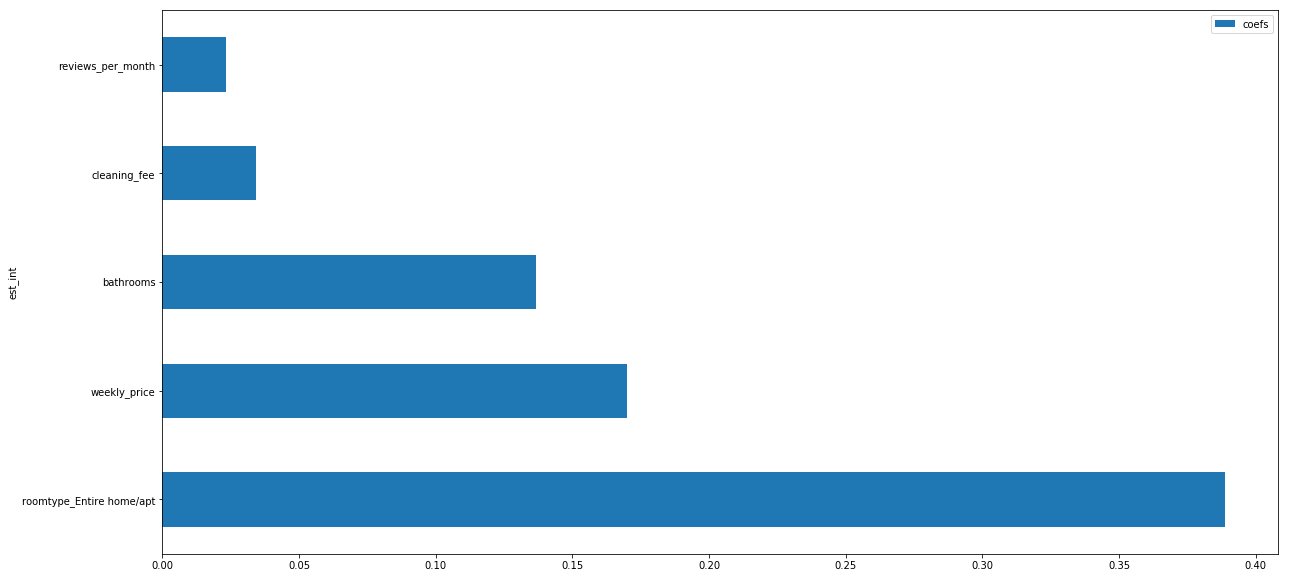

In [208]:
coefs_df.sort_values('coefs', ascending=False).head(5).plot(kind = 'barh',figsize = (20,10));